In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading csv file

In [5]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.rename(columns={'Gender':'gender','Annual Income (k$)':'income','Spending Score (1-100)':'score'}, inplace=True)

In [7]:
df

,CustomerID,gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
df.shape

(200, 5)

In [11]:
df.isnull().values.any()

False

In [12]:
df.describe()

,CustomerID,Age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


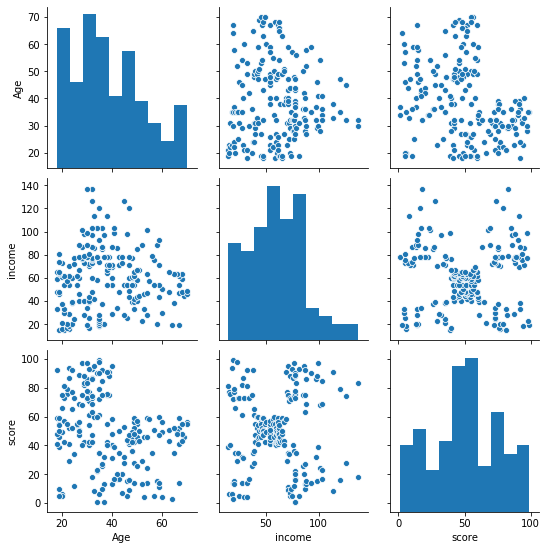

In [13]:
sns.pairplot(df[['Age','income','score']])

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters = 5)

In [16]:
kmeans = kmeans.fit(df[['income','score']])

In [17]:
kmeans.cluster_centers_

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636]])

In [18]:
df['income_cluster'] = kmeans.labels_

In [19]:
df

,CustomerID,gender,Age,income,score,income_cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [20]:
df['income_cluster'].value_counts()

3    81
1    39
2    35
0    23
4    22
Name: income_cluster, dtype: int64

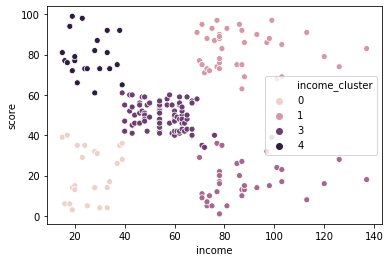

In [22]:
sns.scatterplot(x='income',y='score',hue='income_cluster',data=df)

In [24]:
kmeans = KMeans(n_clusters = 2)
kmeans = kmeans.fit(df[['Age','score']])
kmeans.cluster_centers_

array([[28.95294118, 73.62352941],
       [46.16521739, 32.88695652]])

In [25]:
df['Age_cluster'] = kmeans.labels_
df

,CustomerID,gender,Age,income,score,income_cluster,Age_cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,4,0
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,4,0
4,5,Female,31,17,40,0,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0
196,197,Female,45,126,28,2,1
197,198,Male,32,126,74,1,0
198,199,Male,32,137,18,2,1


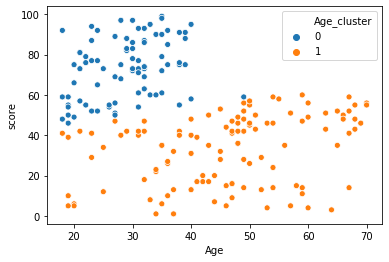

In [26]:
sns.scatterplot(x='Age',y='score',hue='Age_cluster',data=df)

In [30]:
from sklearn.cluster import KMeans
k_range = range(1,12)
wcss = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age','score']])
    wcss.append(km.inertia_)

In [31]:
wcss

[171535.5,
 75949.15601023017,
 45840.67661610867,
 28165.58356662934,
 23872.69755069492,
 19483.1179104427,
 15523.684014328752,
 13054.172145982673,
 11441.988242685962,
 10141.577827664823,
 9536.175584464556]

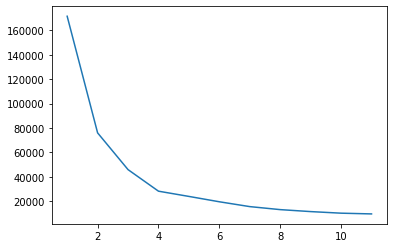

In [32]:
plt.plot(k_range,wcss)